In [24]:
def check_float(textin):
    try:
        float(textin)
        return True

    except ValueError:
        return False

def check_force(folder):
    import os
    import numpy as np
    files = os.listdir(folder)
    cleaned = [float(x) for x in files if check_float(x)]
    print(np.max(cleaned))
    if os.path.exists(folder+"/postProcessing/forces/{}".format(np.max(cleaned))):
        return False
    else:
        return True
    
def retrieve_lift(folder,latest=False):
    import os
    import shutil
    import numpy as np
    
    files = os.listdir(folder)
    cleaned = [x for x in files if check_float(x)]
    files = sorted(cleaned)
    needs_forces = check_force(folder)
    print(needs_forces)
    if needs_forces:
        force_command = "rhoSimpleFoam -postProcess -case {} -func forces".format(folder)
        if latest == True:
            force_command = force_command + " -latestTime"
        os.system(force_command)
    else:
        pass
    
    forces = np.zeros(3)
    moments = np.zeros(3)
    time = np.array([])
    
    for file in files:    
        with open("{}/postProcessing/forces/{}/forces.dat".format(folder,file)) as f:
            full = f.readlines()
            line = full[3]
            starts = []
            ends = []
            for i in range(len(line)):
                if line[i] == '(' and line[i+1] != '(':
                    starts.append(i+1)
                elif line[i] == ')' and line[i-1] != ')':
                    ends.append(i)
            pressure_forces = np.array([float(x) for x in line[starts[0]:ends[0]].split()])
            viscous_forces = np.array([float(x) for x in line[starts[1]:ends[1]].split()])

            pressure_moments = np.array([float(x) for x in line[starts[2]:ends[2]].split()])
            viscous_moments = np.array([float(x) for x in line[starts[3]:ends[3]].split()])
            forces = np.vstack([forces, pressure_forces + viscous_forces])
            moments = np.vstack([moments, pressure_moments + viscous_moments])
            time = np.append(time,float(file))
    return forces, moments, time



In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

directory = '/home/james/Documents/research/completed_cases/bezier_airfoils/'
cases = os.listdir(directory)
data_dict = {}
for i in range(len(cases)):
    print(cases[i])
    data_dict[cases[i]] = retrieve_lift(directory+cases[i])


1.0
0.02
True
/*---------------------------------------------------------------------------*\
  =========                 |
  \\      /  F ield         | OpenFOAM: The Open Source CFD Toolbox
   \\    /   O peration     | Website:  https://openfoam.org
    \\  /    A nd           | Version:  9
     \\/     M anipulation  |
\*---------------------------------------------------------------------------*/
Build  : 9-b456138dc4bc
Exec   : rhoSimpleFoam -postProcess -case /home/james/Documents/research/completed_cases/bezier_airfoils/1.0 -func forces
Date   : Dec 14 2022
Time   : 09:46:22
Host   : "james-power"
PID    : 77339
I/O    : uncollated
Case   : /home/james/Documents/research/completed_cases/bezier_airfoils/1.0
nProcs : 1
sigFpe : Enabling floating point exception trapping (FOAM_SIGFPE).
fileModificationChecking : Monitoring run-time modified files using timeStampMaster (fileModificationSkew 10)
allowSystemOperations : Allowing user-supplied system call operations

// * * * * * * * 

    ln: ./lnInclude


    Ctoo: codeStreamTemplate.C
    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/1.0/dynamicCode/_c37abf929ecd34d50fcf2d51a1db8717b03bee7b/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_c37abf929ecd34d50fcf2d51a1db8717b03bee7b.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/1.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/1.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_c37abf929ecd34d50fcf2d51a1db8717b03bee7b.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/1.0/0/U" master-only-reading:0
Using #calcEntry at line 27 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/1.0/0/U"
Using #codeStream with "/home/james/Documents/research/complet

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/1.0/dynamicCode/_a729d4e76da72a70e9844444bd1e9cce7fcb0367/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_a729d4e76da72a70e9844444bd1e9cce7fcb0367.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/1.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/1.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_a729d4e76da72a70e9844444bd1e9cce7fcb0367.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/1.0/0/U" master-only-reading:0
Using #calcEntry at line 50 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/1.0/0/U/boundaryField/meanFlow"
codeStream : dictionary:"/home/james/Documents/research/completed_case

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/14.0/dynamicCode/_95bebc159f0759de1ce059ba6faa797baee99446/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_95bebc159f0759de1ce059ba6faa797baee99446.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/14.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/14.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_95bebc159f0759de1ce059ba6faa797baee99446.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/14.0/0/U" master-only-reading:0
Using #calcEntry at line 27 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/14.0/0/U"
Using #codeStream with "/home/james/Documents/research/completed_cases/bezier_airfoils/1

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/14.0/dynamicCode/_5aaf73f65d9ae588980968eb127b541a22be2781/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_5aaf73f65d9ae588980968eb127b541a22be2781.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/14.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/14.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_5aaf73f65d9ae588980968eb127b541a22be2781.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/14.0/0/U" master-only-reading:0
Using #calcEntry at line 50 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/14.0/0/U/boundaryField/meanFlow"
codeStream : dictionary:"/home/james/Documents/research/completed

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/-7.0/dynamicCode/_b7efbdbd656d8880c7823c75c7de70005d92b246/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_b7efbdbd656d8880c7823c75c7de70005d92b246.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-7.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-7.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_b7efbdbd656d8880c7823c75c7de70005d92b246.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-7.0/0/U" master-only-reading:0
Using #calcEntry at line 27 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/-7.0/0/U"
Using #codeStream with "/home/james/Documents/research/completed_cases/bezier_airfoils/-

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/-7.0/dynamicCode/_1e9a5910bb58763f0137c525b4557222e60e5bc3/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_1e9a5910bb58763f0137c525b4557222e60e5bc3.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-7.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-7.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_1e9a5910bb58763f0137c525b4557222e60e5bc3.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-7.0/0/U" master-only-reading:0
Using #calcEntry at line 50 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/-7.0/0/U/boundaryField/meanFlow"
codeStream : dictionary:"/home/james/Documents/research/completed

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/13.0/dynamicCode/_bdf250a5593e78baf048971cac9b0f0be10a8527/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_bdf250a5593e78baf048971cac9b0f0be10a8527.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/13.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/13.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_bdf250a5593e78baf048971cac9b0f0be10a8527.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/13.0/0/U" master-only-reading:0
Using #calcEntry at line 27 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/13.0/0/U"
Using #codeStream with "/home/james/Documents/research/completed_cases/bezier_airfoils/1

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/13.0/dynamicCode/_98dc7a06240948a7ccb4896e710e9b8206cdabbc/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_98dc7a06240948a7ccb4896e710e9b8206cdabbc.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/13.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/13.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_98dc7a06240948a7ccb4896e710e9b8206cdabbc.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/13.0/0/U" master-only-reading:0
Using #calcEntry at line 50 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/13.0/0/U/boundaryField/meanFlow"
codeStream : dictionary:"/home/james/Documents/research/completed

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/-6.0/dynamicCode/_2672e03cee4120d803bc93946bc1dd736d5aa5df/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_2672e03cee4120d803bc93946bc1dd736d5aa5df.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-6.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-6.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_2672e03cee4120d803bc93946bc1dd736d5aa5df.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-6.0/0/U" master-only-reading:0
Using #calcEntry at line 27 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/-6.0/0/U"
Using #codeStream with "/home/james/Documents/research/completed_cases/bezier_airfoils/-

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/-6.0/dynamicCode/_d7afd77603ba56a5b043de1f2573bedf87c6d059/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_d7afd77603ba56a5b043de1f2573bedf87c6d059.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-6.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-6.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_d7afd77603ba56a5b043de1f2573bedf87c6d059.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-6.0/0/U" master-only-reading:0
Using #calcEntry at line 50 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/-6.0/0/U/boundaryField/meanFlow"
codeStream : dictionary:"/home/james/Documents/research/completed

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/-9.0/dynamicCode/_6ad9944af148bbc06e0b40394353f9b9ece87508/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_6ad9944af148bbc06e0b40394353f9b9ece87508.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-9.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-9.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_6ad9944af148bbc06e0b40394353f9b9ece87508.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-9.0/0/U" master-only-reading:0
Using #calcEntry at line 27 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/-9.0/0/U"
Using #codeStream with "/home/james/Documents/research/completed_cases/bezier_airfoils/-

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/-9.0/dynamicCode/_599087dbca205e3b4b89ea101768a8ec77b05fe0/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_599087dbca205e3b4b89ea101768a8ec77b05fe0.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-9.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-9.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_599087dbca205e3b4b89ea101768a8ec77b05fe0.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-9.0/0/U" master-only-reading:0
Using #calcEntry at line 50 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/-9.0/0/U/boundaryField/meanFlow"
codeStream : dictionary:"/home/james/Documents/research/completed

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/6.0/dynamicCode/_e86a2d18c94390ecf6cc25b368df7f918e314167/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_e86a2d18c94390ecf6cc25b368df7f918e314167.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/6.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/6.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_e86a2d18c94390ecf6cc25b368df7f918e314167.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/6.0/0/U" master-only-reading:0
Using #calcEntry at line 27 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/6.0/0/U"
Using #codeStream with "/home/james/Documents/research/completed_cases/bezier_airfoils/6.0/dy

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/6.0/dynamicCode/_a08ad1a2586e54c00badf57b5dec1aa4f4ed9db0/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_a08ad1a2586e54c00badf57b5dec1aa4f4ed9db0.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/6.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/6.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_a08ad1a2586e54c00badf57b5dec1aa4f4ed9db0.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/6.0/0/U" master-only-reading:0
Using #calcEntry at line 50 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/6.0/0/U/boundaryField/meanFlow"
codeStream : dictionary:"/home/james/Documents/research/completed_case

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/11.0/dynamicCode/_67666f3360d4353bbb39bc6de7ed04d9c07b9ea9/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_67666f3360d4353bbb39bc6de7ed04d9c07b9ea9.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/11.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/11.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_67666f3360d4353bbb39bc6de7ed04d9c07b9ea9.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/11.0/0/U" master-only-reading:0
Using #calcEntry at line 27 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/11.0/0/U"
Using #codeStream with "/home/james/Documents/research/completed_cases/bezier_airfoils/1

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/11.0/dynamicCode/_fe8e5b5b81a7d4ba6350a2bd9229ac82596f53c2/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_fe8e5b5b81a7d4ba6350a2bd9229ac82596f53c2.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/11.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/11.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_fe8e5b5b81a7d4ba6350a2bd9229ac82596f53c2.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/11.0/0/U" master-only-reading:0
Using #calcEntry at line 50 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/11.0/0/U/boundaryField/meanFlow"
codeStream : dictionary:"/home/james/Documents/research/completed

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/-4.0/dynamicCode/_8e33f5fca8fe16f740f36044dc6e048cbce1cdc5/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_8e33f5fca8fe16f740f36044dc6e048cbce1cdc5.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-4.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-4.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_8e33f5fca8fe16f740f36044dc6e048cbce1cdc5.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-4.0/0/U" master-only-reading:0
Using #calcEntry at line 27 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/-4.0/0/U"
Using #codeStream with "/home/james/Documents/research/completed_cases/bezier_airfoils/-

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/-4.0/dynamicCode/_3294e99a728e38b2ce1eea6d144ed69fd9a087bc/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_3294e99a728e38b2ce1eea6d144ed69fd9a087bc.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-4.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-4.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_3294e99a728e38b2ce1eea6d144ed69fd9a087bc.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-4.0/0/U" master-only-reading:0
Using #calcEntry at line 50 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/-4.0/0/U/boundaryField/meanFlow"
codeStream : dictionary:"/home/james/Documents/research/completed

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/-2.0/dynamicCode/_635d224e918eb574702d14d3f81efe3c41fc2d15/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_635d224e918eb574702d14d3f81efe3c41fc2d15.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-2.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-2.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_635d224e918eb574702d14d3f81efe3c41fc2d15.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-2.0/0/U" master-only-reading:0
Using #calcEntry at line 27 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/-2.0/0/U"
Using #codeStream with "/home/james/Documents/research/completed_cases/bezier_airfoils/-

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/-2.0/dynamicCode/_7560955b872e0ac3a29787b6a39baabf14dd7674/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_7560955b872e0ac3a29787b6a39baabf14dd7674.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-2.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-2.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_7560955b872e0ac3a29787b6a39baabf14dd7674.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-2.0/0/U" master-only-reading:0
Using #calcEntry at line 50 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/-2.0/0/U/boundaryField/meanFlow"
codeStream : dictionary:"/home/james/Documents/research/completed

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/2.0/dynamicCode/_d46a817eea9bf61daf1d380bb685e427a7a45f49/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_d46a817eea9bf61daf1d380bb685e427a7a45f49.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/2.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/2.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_d46a817eea9bf61daf1d380bb685e427a7a45f49.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/2.0/0/U" master-only-reading:0
Using #calcEntry at line 27 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/2.0/0/U"
Using #codeStream with "/home/james/Documents/research/completed_cases/bezier_airfoils/2.0/dy

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/2.0/dynamicCode/_538cafea5aab7c8bc07e3d4fde0cb83a8e6b2f2d/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_538cafea5aab7c8bc07e3d4fde0cb83a8e6b2f2d.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/2.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/2.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_538cafea5aab7c8bc07e3d4fde0cb83a8e6b2f2d.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/2.0/0/U" master-only-reading:0
Using #calcEntry at line 50 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/2.0/0/U/boundaryField/meanFlow"
codeStream : dictionary:"/home/james/Documents/research/completed_case

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/3.0/dynamicCode/_f0449c83cb2f5214754ba1679c19efacb6cf508b/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_f0449c83cb2f5214754ba1679c19efacb6cf508b.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/3.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/3.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_f0449c83cb2f5214754ba1679c19efacb6cf508b.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/3.0/0/U" master-only-reading:0
Using #calcEntry at line 27 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/3.0/0/U"
Using #codeStream with "/home/james/Documents/research/completed_cases/bezier_airfoils/3.0/dy

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/3.0/dynamicCode/_4f6db14fd9deab05570f55f8e608e39b9ca004ae/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_4f6db14fd9deab05570f55f8e608e39b9ca004ae.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/3.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/3.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_4f6db14fd9deab05570f55f8e608e39b9ca004ae.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/3.0/0/U" master-only-reading:0
Using #calcEntry at line 50 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/3.0/0/U/boundaryField/meanFlow"
codeStream : dictionary:"/home/james/Documents/research/completed_case

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/-8.0/dynamicCode/_25a260519d6db439ce498c6f5e5d67039b0d316a/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_25a260519d6db439ce498c6f5e5d67039b0d316a.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-8.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-8.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_25a260519d6db439ce498c6f5e5d67039b0d316a.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-8.0/0/U" master-only-reading:0
Using #calcEntry at line 27 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/-8.0/0/U"
Using #codeStream with "/home/james/Documents/research/completed_cases/bezier_airfoils/-

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/-8.0/dynamicCode/_c90c1c4dd7e9b490c522b7557f5466f2575c8676/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_c90c1c4dd7e9b490c522b7557f5466f2575c8676.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-8.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-8.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_c90c1c4dd7e9b490c522b7557f5466f2575c8676.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-8.0/0/U" master-only-reading:0
Using #calcEntry at line 50 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/-8.0/0/U/boundaryField/meanFlow"
codeStream : dictionary:"/home/james/Documents/research/completed

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/17.0/dynamicCode/_c7fdc9a45f8f3695d7105d99e4eb97fed4c020c7/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_c7fdc9a45f8f3695d7105d99e4eb97fed4c020c7.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/17.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/17.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_c7fdc9a45f8f3695d7105d99e4eb97fed4c020c7.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/17.0/0/U" master-only-reading:0
Using #calcEntry at line 27 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/17.0/0/U"
Using #codeStream with "/home/james/Documents/research/completed_cases/bezier_airfoils/1

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/17.0/dynamicCode/_3f2ebe189503c3820a32612cfd08359e73afd7e0/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_3f2ebe189503c3820a32612cfd08359e73afd7e0.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/17.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/17.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_3f2ebe189503c3820a32612cfd08359e73afd7e0.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/17.0/0/U" master-only-reading:0
Using #calcEntry at line 50 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/17.0/0/U/boundaryField/meanFlow"
codeStream : dictionary:"/home/james/Documents/research/completed

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/8.0/dynamicCode/_590ab35cc2b0ff2b6bff75ca65c56a4eb868b479/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_590ab35cc2b0ff2b6bff75ca65c56a4eb868b479.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/8.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/8.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_590ab35cc2b0ff2b6bff75ca65c56a4eb868b479.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/8.0/0/U" master-only-reading:0
Using #calcEntry at line 27 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/8.0/0/U"
Using #codeStream with "/home/james/Documents/research/completed_cases/bezier_airfoils/8.0/dy

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/8.0/dynamicCode/_f3af6a97eb8d05d8d527a6f2a2e890b19451c627/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_f3af6a97eb8d05d8d527a6f2a2e890b19451c627.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/8.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/8.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_f3af6a97eb8d05d8d527a6f2a2e890b19451c627.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/8.0/0/U" master-only-reading:0
Using #calcEntry at line 50 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/8.0/0/U/boundaryField/meanFlow"
codeStream : dictionary:"/home/james/Documents/research/completed_case

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/-1.0/dynamicCode/_f2af43b7706d3a959670923ba64f9c7a8d4e07ed/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_f2af43b7706d3a959670923ba64f9c7a8d4e07ed.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-1.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-1.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_f2af43b7706d3a959670923ba64f9c7a8d4e07ed.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-1.0/0/U" master-only-reading:0
Using #calcEntry at line 27 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/-1.0/0/U"
Using #codeStream with "/home/james/Documents/research/completed_cases/bezier_airfoils/-

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/-1.0/dynamicCode/_25790afeca1e66922123b7ec72393737634731cf/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_25790afeca1e66922123b7ec72393737634731cf.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-1.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-1.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_25790afeca1e66922123b7ec72393737634731cf.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-1.0/0/U" master-only-reading:0
Using #calcEntry at line 50 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/-1.0/0/U/boundaryField/meanFlow"
codeStream : dictionary:"/home/james/Documents/research/completed

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/20.0/dynamicCode/_32cabf603d930214f894b4f4841e0534453656d4/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_32cabf603d930214f894b4f4841e0534453656d4.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/20.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/20.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_32cabf603d930214f894b4f4841e0534453656d4.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/20.0/0/U" master-only-reading:0
Using #calcEntry at line 27 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/20.0/0/U"
Using #codeStream with "/home/james/Documents/research/completed_cases/bezier_airfoils/2

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/20.0/dynamicCode/_03e3281d3d24da52d908d22b5d1a7dd7f2d09eed/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_03e3281d3d24da52d908d22b5d1a7dd7f2d09eed.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/20.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/20.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_03e3281d3d24da52d908d22b5d1a7dd7f2d09eed.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/20.0/0/U" master-only-reading:0
Using #calcEntry at line 50 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/20.0/0/U/boundaryField/meanFlow"
codeStream : dictionary:"/home/james/Documents/research/completed

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/16.0/dynamicCode/_81b1773e32424c9e5de7fcbe8ec67467648bce20/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_81b1773e32424c9e5de7fcbe8ec67467648bce20.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/16.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/16.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_81b1773e32424c9e5de7fcbe8ec67467648bce20.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/16.0/0/U" master-only-reading:0
Using #calcEntry at line 27 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/16.0/0/U"
Using #codeStream with "/home/james/Documents/research/completed_cases/bezier_airfoils/1

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/16.0/dynamicCode/_005fc04296d65f4ebb1a05279a43cb487e6bced1/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_005fc04296d65f4ebb1a05279a43cb487e6bced1.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/16.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/16.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_005fc04296d65f4ebb1a05279a43cb487e6bced1.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/16.0/0/U" master-only-reading:0
Using #calcEntry at line 50 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/16.0/0/U/boundaryField/meanFlow"
codeStream : dictionary:"/home/james/Documents/research/completed

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/-5.0/dynamicCode/_01779c8b8b521b26143c7a84515acc8725d1e91c/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_01779c8b8b521b26143c7a84515acc8725d1e91c.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-5.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-5.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_01779c8b8b521b26143c7a84515acc8725d1e91c.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-5.0/0/U" master-only-reading:0
Using #calcEntry at line 27 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/-5.0/0/U"
Using #codeStream with "/home/james/Documents/research/completed_cases/bezier_airfoils/-

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/-5.0/dynamicCode/_e99a0664415e683b5205b5ef37b52cdac0851f92/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_e99a0664415e683b5205b5ef37b52cdac0851f92.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-5.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-5.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_e99a0664415e683b5205b5ef37b52cdac0851f92.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-5.0/0/U" master-only-reading:0
Using #calcEntry at line 50 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/-5.0/0/U/boundaryField/meanFlow"
codeStream : dictionary:"/home/james/Documents/research/completed

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/7.0/dynamicCode/_31a2c5a68b88ba41ef9a95288e2c68a448b92843/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_31a2c5a68b88ba41ef9a95288e2c68a448b92843.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/7.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/7.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_31a2c5a68b88ba41ef9a95288e2c68a448b92843.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/7.0/0/U" master-only-reading:0
Using #calcEntry at line 27 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/7.0/0/U"
Using #codeStream with "/home/james/Documents/research/completed_cases/bezier_airfoils/7.0/dy

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/7.0/dynamicCode/_5b7b174646e02a0f1892f2917b88d6efa04f6ffc/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_5b7b174646e02a0f1892f2917b88d6efa04f6ffc.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/7.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/7.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_5b7b174646e02a0f1892f2917b88d6efa04f6ffc.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/7.0/0/U" master-only-reading:0
Using #calcEntry at line 50 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/7.0/0/U/boundaryField/meanFlow"
codeStream : dictionary:"/home/james/Documents/research/completed_case

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/9.0/dynamicCode/_b424bbe177fc2451b27ab1619f961f4bb39ab94b/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_b424bbe177fc2451b27ab1619f961f4bb39ab94b.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/9.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/9.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_b424bbe177fc2451b27ab1619f961f4bb39ab94b.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/9.0/0/U" master-only-reading:0
Using #calcEntry at line 27 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/9.0/0/U"
Using #codeStream with "/home/james/Documents/research/completed_cases/bezier_airfoils/9.0/dy

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/9.0/dynamicCode/_97c76930ae846045db581327776ea525b6590b08/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_97c76930ae846045db581327776ea525b6590b08.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/9.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/9.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_97c76930ae846045db581327776ea525b6590b08.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/9.0/0/U" master-only-reading:0
Using #calcEntry at line 50 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/9.0/0/U/boundaryField/meanFlow"
codeStream : dictionary:"/home/james/Documents/research/completed_case

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/4.0/dynamicCode/_4dfc7ab3903838229e7b770e2eed53a34e0430bb/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_4dfc7ab3903838229e7b770e2eed53a34e0430bb.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/4.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/4.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_4dfc7ab3903838229e7b770e2eed53a34e0430bb.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/4.0/0/U" master-only-reading:0
Using #calcEntry at line 27 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/4.0/0/U"
Using #codeStream with "/home/james/Documents/research/completed_cases/bezier_airfoils/4.0/dy

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/4.0/dynamicCode/_d7ff8a9799710d5123bf1d1e55ae156a4c51630a/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_d7ff8a9799710d5123bf1d1e55ae156a4c51630a.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/4.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/4.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_d7ff8a9799710d5123bf1d1e55ae156a4c51630a.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/4.0/0/U" master-only-reading:0
Using #calcEntry at line 50 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/4.0/0/U/boundaryField/meanFlow"
codeStream : dictionary:"/home/james/Documents/research/completed_case

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/-10.0/dynamicCode/_60ddb874061da2e2bb85d99badc58a87fa78b5bc/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_60ddb874061da2e2bb85d99badc58a87fa78b5bc.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-10.0/0/U" master-only-reading:0

on processor 0 have masterSize:182496 and localSize:182496

on processor 0 after waiting: have masterSize:182496 and localSize:182496
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-10.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_60ddb874061da2e2bb85d99badc58a87fa78b5bc.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-10.0/0/U" master-only-reading:0
Using #calcEntry at line 27 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/-10.0/0/U"
Using #codeStream with "/home/james/Documents/research/completed_cases/bezier_airfo

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/-10.0/dynamicCode/_cc7c6b7e76b120784870c34989f915b8c6839293/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_cc7c6b7e76b120784870c34989f915b8c6839293.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-10.0/0/U" master-only-reading:0

on processor 0 have masterSize:182496 and localSize:182496

on processor 0 after waiting: have masterSize:182496 and localSize:182496
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-10.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_cc7c6b7e76b120784870c34989f915b8c6839293.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-10.0/0/U" master-only-reading:0
Using #calcEntry at line 50 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/-10.0/0/U/boundaryField/meanFlow"
codeStream : dictionary:"/home/james/Documents/research/comp

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/0.0/dynamicCode/_43e0f9e69ae5f674efa2eb3c8a4b26bdf2df1fb4/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_43e0f9e69ae5f674efa2eb3c8a4b26bdf2df1fb4.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/0.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/0.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_43e0f9e69ae5f674efa2eb3c8a4b26bdf2df1fb4.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/0.0/0/U" master-only-reading:0
Using #calcEntry at line 27 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/0.0/0/U"
Using #codeStream with "/home/james/Documents/research/completed_cases/bezier_airfoils/0.0/dy

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/0.0/dynamicCode/_2101c9c936767dc07e4128049bbe75f5bf60c0d8/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_2101c9c936767dc07e4128049bbe75f5bf60c0d8.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/0.0/0/U" master-only-reading:0

on processor 0 have masterSize:182392 and localSize:182392

on processor 0 after waiting: have masterSize:182392 and localSize:182392
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/0.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_2101c9c936767dc07e4128049bbe75f5bf60c0d8.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/0.0/0/U" master-only-reading:0
Using #calcEntry at line 50 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/0.0/0/U/boundaryField/meanFlow"
codeStream : dictionary:"/home/james/Documents/research/completed_case

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/18.0/dynamicCode/_ef8ad4f7023eb8013c52c295a7f6f7ee8a818616/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_ef8ad4f7023eb8013c52c295a7f6f7ee8a818616.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/18.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/18.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_ef8ad4f7023eb8013c52c295a7f6f7ee8a818616.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/18.0/0/U" master-only-reading:0
Using #calcEntry at line 27 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/18.0/0/U"
Using #codeStream with "/home/james/Documents/research/completed_cases/bezier_airfoils/1

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/18.0/dynamicCode/_d1b1aab60bb6cb0298033168ad5054c4b261caeb/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_d1b1aab60bb6cb0298033168ad5054c4b261caeb.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/18.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/18.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_d1b1aab60bb6cb0298033168ad5054c4b261caeb.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/18.0/0/U" master-only-reading:0
Using #calcEntry at line 50 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/18.0/0/U/boundaryField/meanFlow"
codeStream : dictionary:"/home/james/Documents/research/completed

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/15.0/dynamicCode/_7e0cbf290816c561d72d230941dd418a58982947/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_7e0cbf290816c561d72d230941dd418a58982947.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/15.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/15.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_7e0cbf290816c561d72d230941dd418a58982947.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/15.0/0/U" master-only-reading:0
Using #calcEntry at line 27 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/15.0/0/U"
Using #codeStream with "/home/james/Documents/research/completed_cases/bezier_airfoils/1

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/15.0/dynamicCode/_d1c5c69229f939823bff32d93a2033d473fb69d9/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_d1c5c69229f939823bff32d93a2033d473fb69d9.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/15.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/15.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_d1c5c69229f939823bff32d93a2033d473fb69d9.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/15.0/0/U" master-only-reading:0
Using #calcEntry at line 50 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/15.0/0/U/boundaryField/meanFlow"
codeStream : dictionary:"/home/james/Documents/research/completed

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/10.0/dynamicCode/_77ae006539e003782cbef52cfea02a0d216bdff1/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_77ae006539e003782cbef52cfea02a0d216bdff1.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/10.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/10.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_77ae006539e003782cbef52cfea02a0d216bdff1.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/10.0/0/U" master-only-reading:0
Using #calcEntry at line 27 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/10.0/0/U"
Using #codeStream with "/home/james/Documents/research/completed_cases/bezier_airfoils/1

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/10.0/dynamicCode/_c477ad0e19b5c7f5648c1c63b05fb4cad9998fbe/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_c477ad0e19b5c7f5648c1c63b05fb4cad9998fbe.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/10.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/10.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_c477ad0e19b5c7f5648c1c63b05fb4cad9998fbe.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/10.0/0/U" master-only-reading:0
Using #calcEntry at line 50 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/10.0/0/U/boundaryField/meanFlow"
codeStream : dictionary:"/home/james/Documents/research/completed

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/19.0/dynamicCode/_7ec9ab7a5481075c14358befdfc1098bafb32c93/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_7ec9ab7a5481075c14358befdfc1098bafb32c93.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/19.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/19.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_7ec9ab7a5481075c14358befdfc1098bafb32c93.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/19.0/0/U" master-only-reading:0
Using #calcEntry at line 27 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/19.0/0/U"
Using #codeStream with "/home/james/Documents/research/completed_cases/bezier_airfoils/1

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/19.0/dynamicCode/_a3c261636baba83d82787d0ab3d07d95460c22cf/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_a3c261636baba83d82787d0ab3d07d95460c22cf.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/19.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/19.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_a3c261636baba83d82787d0ab3d07d95460c22cf.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/19.0/0/U" master-only-reading:0
Using #calcEntry at line 50 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/19.0/0/U/boundaryField/meanFlow"
codeStream : dictionary:"/home/james/Documents/research/completed

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/-3.0/dynamicCode/_48d0a492662b4af48ed172cc1f860d0014d733be/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_48d0a492662b4af48ed172cc1f860d0014d733be.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-3.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-3.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_48d0a492662b4af48ed172cc1f860d0014d733be.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-3.0/0/U" master-only-reading:0
Using #calcEntry at line 27 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/-3.0/0/U"
Using #codeStream with "/home/james/Documents/research/completed_cases/bezier_airfoils/-

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/-3.0/dynamicCode/_968b5bf299bed9c769992bfe7a9329a92e0b80cd/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_968b5bf299bed9c769992bfe7a9329a92e0b80cd.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-3.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-3.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_968b5bf299bed9c769992bfe7a9329a92e0b80cd.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/-3.0/0/U" master-only-reading:0
Using #calcEntry at line 50 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/-3.0/0/U/boundaryField/meanFlow"
codeStream : dictionary:"/home/james/Documents/research/completed

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/12.0/dynamicCode/_f7f2f703b23c43a30227361a4c3e7cc9daf03fd7/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_f7f2f703b23c43a30227361a4c3e7cc9daf03fd7.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/12.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/12.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_f7f2f703b23c43a30227361a4c3e7cc9daf03fd7.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/12.0/0/U" master-only-reading:0
Using #calcEntry at line 27 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/12.0/0/U"
Using #codeStream with "/home/james/Documents/research/completed_cases/bezier_airfoils/1

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/12.0/dynamicCode/_6a76d47b5c1cbf301f603ea70c51cf613b24b78a/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_6a76d47b5c1cbf301f603ea70c51cf613b24b78a.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/12.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/12.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_6a76d47b5c1cbf301f603ea70c51cf613b24b78a.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/12.0/0/U" master-only-reading:0
Using #calcEntry at line 50 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/12.0/0/U/boundaryField/meanFlow"
codeStream : dictionary:"/home/james/Documents/research/completed

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/5.0/dynamicCode/_019c6817db750fe47a6d88d8c94f9813bff2a0c2/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_019c6817db750fe47a6d88d8c94f9813bff2a0c2.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/5.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/5.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_019c6817db750fe47a6d88d8c94f9813bff2a0c2.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/5.0/0/U" master-only-reading:0
Using #calcEntry at line 27 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/5.0/0/U"
Using #codeStream with "/home/james/Documents/research/completed_cases/bezier_airfoils/5.0/dy

    ln: ./lnInclude


    ld: /home/james/Documents/research/completed_cases/bezier_airfoils/5.0/dynamicCode/_363549743dce2544f759dc45c2c92192c3186f59/../platforms/linux64GccDPInt32Opt/lib/libcodeStream_363549743dce2544f759dc45c2c92192c3186f59.so
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/5.0/0/U" master-only-reading:0

on processor 0 have masterSize:182488 and localSize:182488

on processor 0 after waiting: have masterSize:182488 and localSize:182488
Opening cached dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/5.0/dynamicCode/platforms/linux64GccDPInt32Opt/lib/libcodeStream_363549743dce2544f759dc45c2c92192c3186f59.so"
codeStream : dictionary:"/home/james/Documents/research/completed_cases/bezier_airfoils/5.0/0/U" master-only-reading:0
Using #calcEntry at line 50 in file "/home/james/Documents/research/completed_cases/bezier_airfoils/5.0/0/U/boundaryField/meanFlow"
codeStream : dictionary:"/home/james/Documents/research/completed_case

(array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.24696900e+00,  2.82960700e-02, -6.12114317e-18],
       [ 5.39739600e+00,  2.88437369e+01, -3.61573700e-18]]), array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.68963477e-18, -2.00822025e-18, -4.52527800e-03],
       [-1.63460727e-18, -2.33321210e-18, -6.42483528e+00]]), array([0.  , 0.02]))


<IPython.core.display.Javascript object>


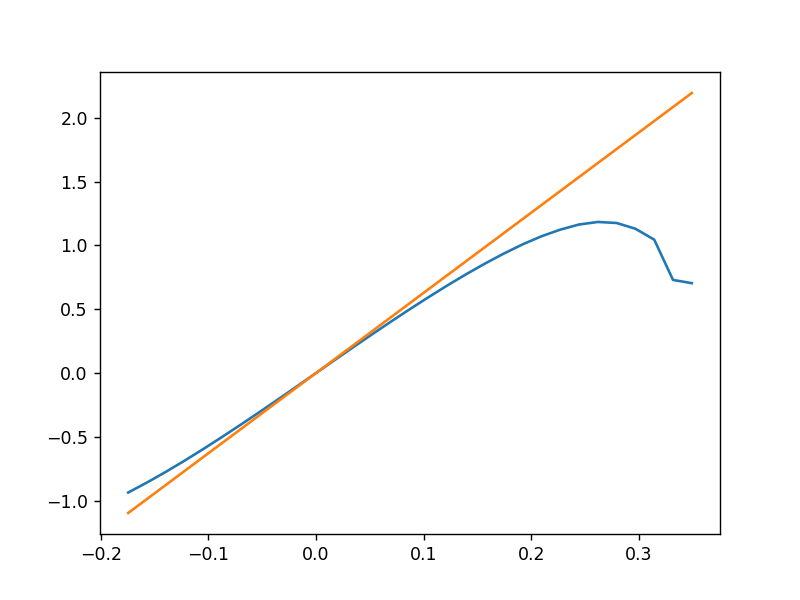

<IPython.core.display.Javascript object>


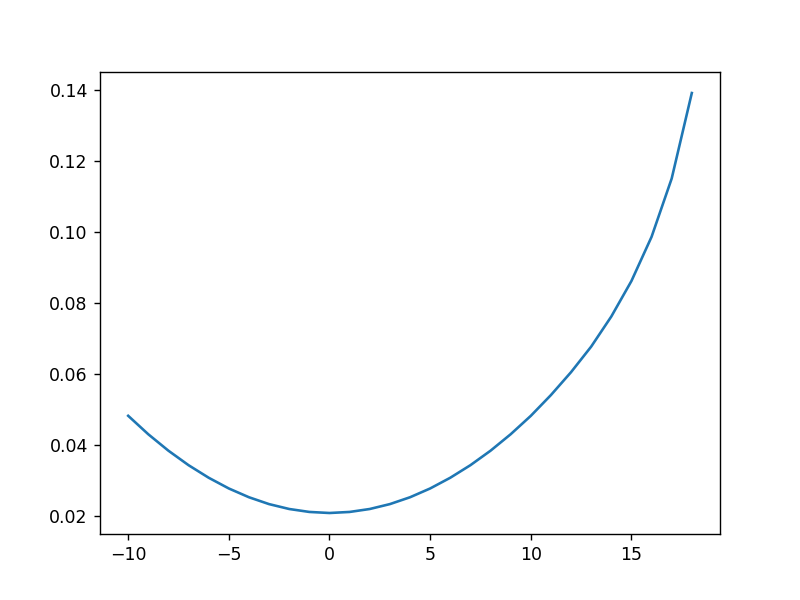

In [26]:
import os
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook
N_startup = 50
folders = os.listdir(directory)
numfold = []
for i in folders:
    numfold.append(int(i[:-2]))
numfold = np.array(numfold)
sorted_nums = np.sort(numfold)
sortind = np.argsort(numfold)
folders = [folders[i] for i in sortind]
numfold = numfold[sortind]
rad = numfold * np.pi / 180
lift = np.array([])
drag = np.array([])
print(data_dict['1.0'])
for i in range(len(folders)):    
    forces, moments, time = data_dict[folders[i]]
    lift = np.append(lift,forces[2,1]*np.cos(rad[i])-forces[2,0]*np.sin(rad[i]))
    drag = np.append(drag,forces[2,0]*np.cos(rad[i])+forces[2,1]*np.sin(rad[i]))
CL = lift / (1.17 * 40**2 * .5 * .3)
CD = drag / (1.17 * 40**2 * .5 * .3)
    
    
taf = rad * 2 * np.pi
plt.figure()
plt.plot(rad,CL)
plt.plot(rad,taf)

plt.figure()
plt.plot(numfold[:-2],CD[:-2])

    
            


[0.02044951 0.02032289 0.0203862  0.0203862  0.020956  ]
[0.19825261 0.19812599 0.19740424 0.19702437 0.19575815]
0.18233618233618235


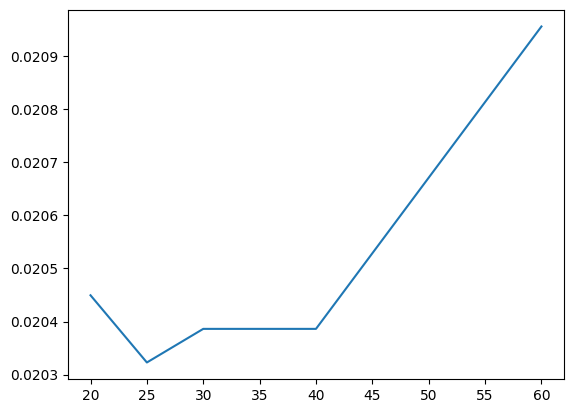

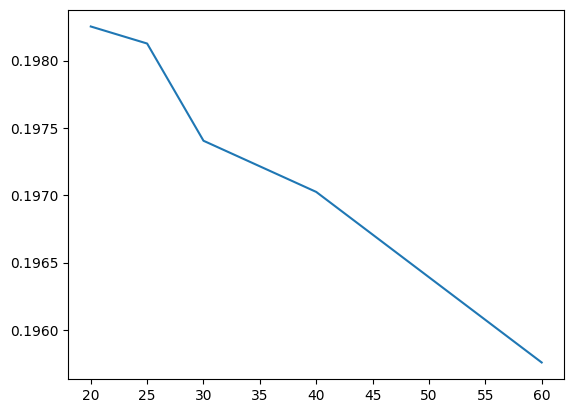

In [24]:
import numpy as np
from matplotlib import pyplot as plt
U = 30
Q = 1.17 * U**2 * .5 * .3
Ly = np.array([31.314,31.294,31.18,31.12,30.92])
Dy = np.array([3.23,3.21,3.22,3.22,3.31])
y = np.array([20,25,30,40,60])
CD = Dy/Q
CL = Ly/Q
print(CD)
print(CL)

plt.figure()
plt.plot(y,CD)

plt.figure()
plt.plot(y,CL)

print(28.8/Q)

In [21]:
print(1.26+2.05)

3.3099999999999996
